In [1]:
import matplotlib_inline.backend_inline
import seaborn as sns

sns.set_style(style="white")
sns.set_context("talk")

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")


In [2]:
import h5py
import numpy as np

f = h5py.File('./2D_TwoLayer_Data.jld2', 'r')
grid = f['grid']
snapshots = f['snapshots']

# Initialize the grid of x and y coordinates
x = grid['x'][()]
y = grid['y'][()]

# Grab u, v, and q for all snapshots and layers (we will just use the top layer)
u = snapshots['u']
v = snapshots['v']
q = snapshots['q']

In [3]:
!pip install ../../fluidsf
import fluidsf

# The '9950' index pulls the final snapshot of the simulated data, once the turbulence and energetics are spun-up
sfs_2D_maps = fluidsf.generate_2D_SF_maps(u['9950'][0], v['9950'][0], x, y, 
                                         traditional_type=["LLL"])
                                          #traditional_type=["LLL", "LL", "TT", "LSS"])

sfs_list = fluidsf.generate_structure_functions(u['9950'][0], v['9950'][0], x, y, 
                                         traditional_type=["LLL"])

# The following lines could be used to diagnose structure functions for all snapshots 
# of data, but this is too slow for an example

#sfs_2D_maps = [
#    fluidsf.generate_2D_SF_maps(u[d][0], v[d][0], x, y)
#    for d in u.keys()]

#sfs_list = [
#    fluidsf.generate_structure_functions(u[d][0], v[d][0], x, y)
#    for d in u.keys()]

Processing /Users/brodiepearson/Documents/GitHub/fluidsf
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: Could not install packages due to an OSError: [('/Users/brodiepearson/Documents/GitHub/fluidsf/.git/objects/ca/d34c4b9b91ac276b4d4dcf3edc9bae054ccbca', '/private/var/folders/s4/b0kf2lp10_xgphdc7j7z3clh0000gn/T/pip-req-build-nnu8i2ep/.git/objects/ca/d34c4b9b91ac276b4d4dcf3edc9bae054ccbca', "[Errno 28] No space left on device: '/Users/brodiepearson/Documents/GitHub/fluidsf/.git/objects/ca/d34c4b9b91ac276b4d4dcf3edc9bae054ccbca' -> '/private/var/folders/s4/b0kf2lp10_xgphdc7j7z3clh0000gn/T/pip-req-build-nnu8i2ep/.git/objects/ca/d34c4b9b91

/Users/brodiepearson/opt/miniconda3/lib/python3.9/site-packages/fluidsf/calculate_2D_SF_maps.py:124: RuntimeWarning: invalid value encountered in double_scalars
  cosine_angle = x_separation / np.sqrt(x_separation**2 + y_separation**2)
/Users/brodiepearson/opt/miniconda3/lib/python3.9/site-packages/fluidsf/calculate_2D_SF_maps.py:125: RuntimeWarning: invalid value encountered in double_scalars
  sine_angle = y_separation / np.sqrt(x_separation**2 + y_separation**2)
/Users/brodiepearson/opt/miniconda3/lib/python3.9/site-packages/fluidsf/calculate_2D_SF_maps.py:128: RuntimeWarning: Mean of empty slice
  SF_dict["SF_LL_xy"] = np.nanmean(
/Users/brodiepearson/opt/miniconda3/lib/python3.9/site-packages/fluidsf/calculate_2D_SF_maps.py:138: RuntimeWarning: Mean of empty slice
  SF_dict["SF_LLL_xy"] = np.nanmean(


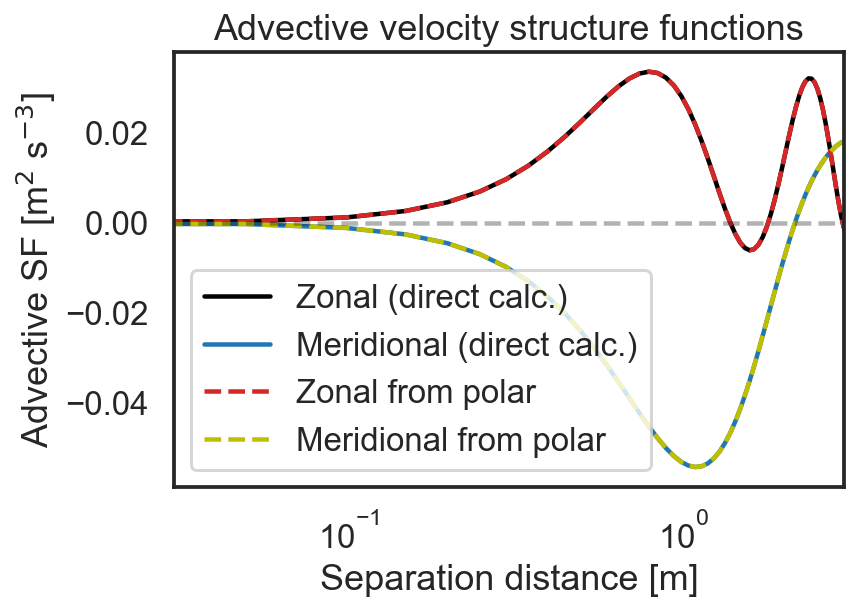

In [4]:
# First, let us check that the polar code calculates the same 
# zonal (purely x-separated) and meridional (purely y-separated)
# structure functions as the core 1D calculation modules

import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots()

ax1.semilogx(sfs_list['x-diffs'], sfs_list['SF_advection_velocity_x'],label=r'Zonal (direct calc.)',color='k')
ax1.semilogx(sfs_list['y-diffs'], sfs_list['SF_advection_velocity_y'], label=r'Meridional (direct calc.)',
             color='tab:blue')
ax1.semilogx(sfs_list['y-diffs'], sfs_2D_maps['SF_velocity_advection_xy'][:,64], label=r'Zonal from polar',
             color='tab:red', linestyle='dashed')
ax1.semilogx(sfs_list['y-diffs'], sfs_2D_maps['SF_velocity_advection_xy'][0,64:], label=r'Meridional from polar',
             color='y', linestyle='dashed')

ax1.set_ylabel(r"Advective SF [m$^2$ s$^{-3}$]")
ax1.set_xlabel(r"Separation distance [m]")
ax1.set_xlim(3e-2,3e0)
ax1.legend()
plt.hlines(0,3e-2,3e0,color='k',linestyle='dashed',alpha=0.3)
plt.title('Advective velocity structure functions');

In [5]:
# Now we construct a 2D map of the advective structure function 
# To do this, note that a separation vector with a positive x and y component 
# is equivalent to a separation vector with negative x and y component, 
# similarly the negative-y positive-x quadrant maps to positive-y negative-x

# First we construct these polar map arrays by appending these quadrants to the two already calculated

TwoD_map_x_separations = np.append(-np.flip(sfs_2D_maps['x_separations']), sfs_2D_maps['x_separations'], axis=0)
TwoD_map_y_separations = np.append(-np.flip(sfs_2D_maps['y_separations']), sfs_2D_maps['y_separations'], axis=0)
TwoD_map_advective_SF = np.append(np.flip(sfs_2D_maps['SF_velocity_advection_xy']), 
                                   sfs_2D_maps['SF_velocity_advection_xy'], axis=0)
TwoD_map_LL_SF = np.append(np.flip(sfs_2D_maps['SF_LL_xy']), 
                                   sfs_2D_maps['SF_LL_xy'], axis=0)
TwoD_map_LLL_SF = np.append(np.flip(sfs_2D_maps['SF_LLL_xy']), 
                                   sfs_2D_maps['SF_LLL_xy'], axis=0)


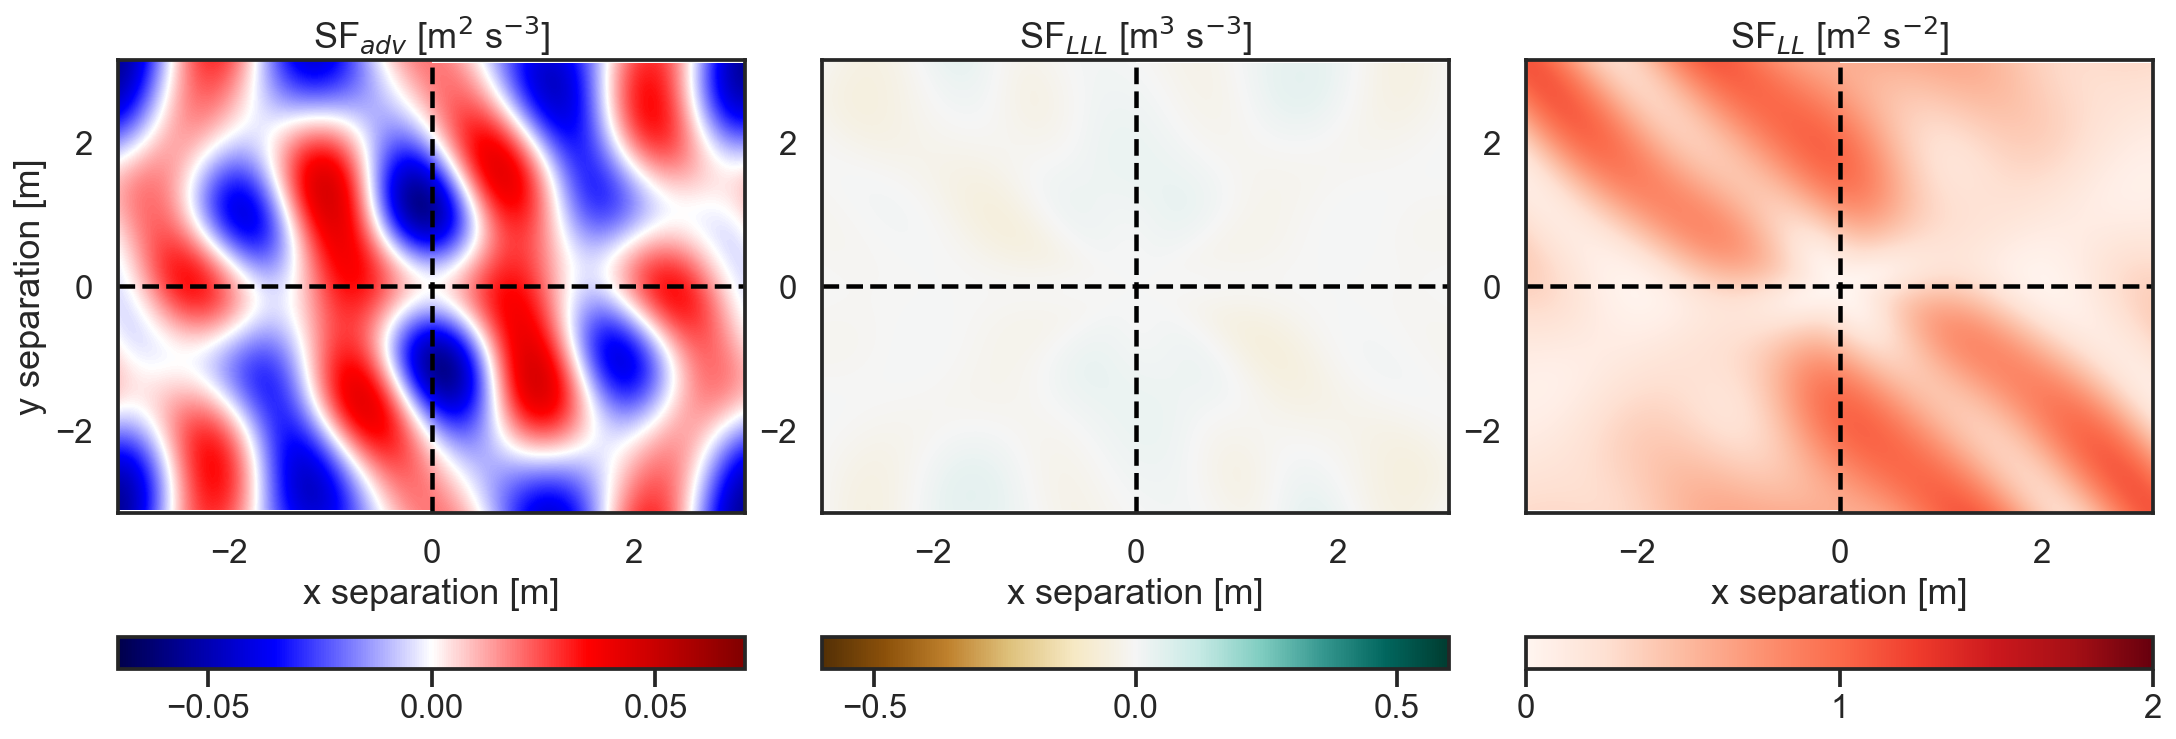

In [6]:
fig, axs = plt.subplots(1,3, figsize=(15,5), layout='constrained')

Advective = axs[0].contourf(TwoD_map_x_separations,
            TwoD_map_y_separations,
            TwoD_map_advective_SF, 
            levels=np.linspace(-0.07, 0.07, 1001), 
                            cmap=plt.cm.seismic)
axs[0].set_xlabel('x separation [m]')
axs[0].set_ylabel('y separation [m]')
axs[0].set_title('SF$_{adv}$ [m$^2$ s$^{-3}$]')

cbar = fig.colorbar(Advective, ax=axs[0], location='bottom')
cbar.set_ticks([-0.05, 0, 0.05])
axs[0].axhline(0, color='black', linestyle='--')
axs[0].axvline(0, color='black', linestyle='--')

LLL = axs[1].contourf(TwoD_map_x_separations,
            TwoD_map_y_separations,
            TwoD_map_LLL_SF, 
            levels=np.linspace(-0.6, 0.6, 1001), 
                            cmap=plt.cm.BrBG)
axs[1].set_xlabel('x separation [m]')
axs[1].set_title('SF$_{LLL}$ [m$^3$ s$^{-3}$]')

cbar = fig.colorbar(LLL, ax=axs[1], location='bottom')
cbar.set_ticks([-0.5, 0, 0.5])
axs[1].axhline(0, color='black', linestyle='--')
axs[1].axvline(0, color='black', linestyle='--')

LL = axs[2].contourf(TwoD_map_x_separations,
            TwoD_map_y_separations,
            TwoD_map_LL_SF, 
            levels=np.linspace(0, 2, 1001), 
                            cmap=plt.cm.Reds)
axs[2].set_xlabel('x separation [m]')
axs[2].set_title('SF$_{LL}$ [m$^2$ s$^{-2}$]')

cbar = fig.colorbar(LL, ax=axs[2], location='bottom')
cbar.set_ticks([0, 1, 2])
axs[2].axhline(0, color='black', linestyle='--')
axs[2].axvline(0, color='black', linestyle='--')


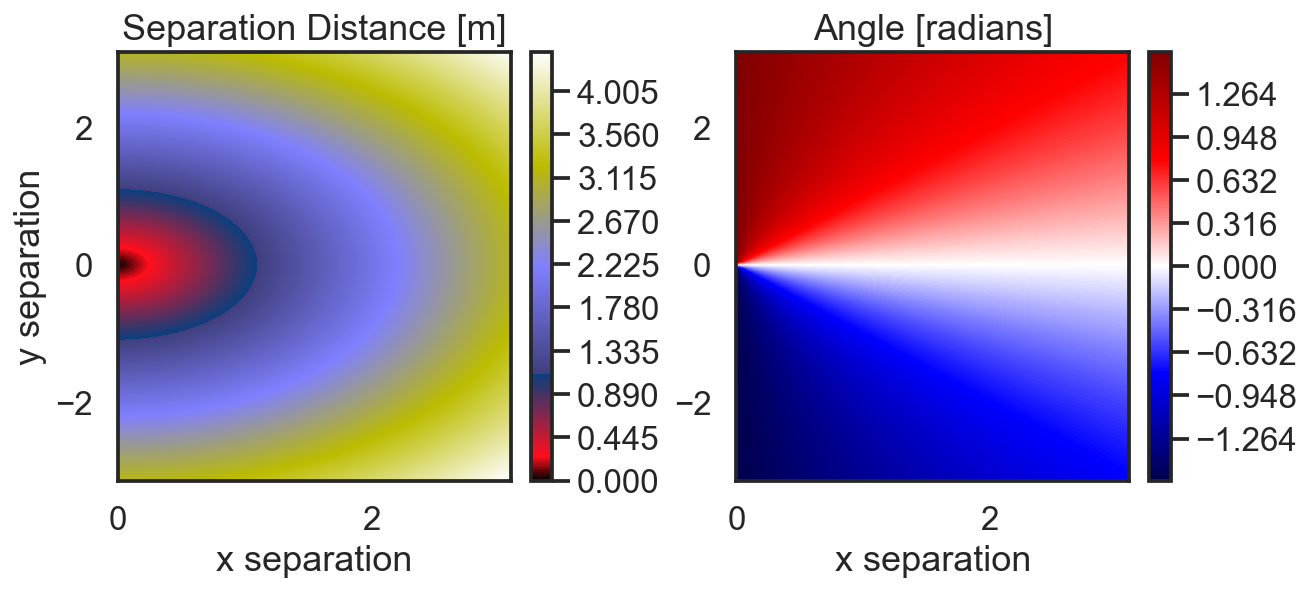

In [7]:
# The 2D map modules also output separation distance and angle
# These could be useful for users, for example when binning or performing analyses
# Although these properties are not used in this example, we visualize them below
# to demonstrate how to access and use these arrays

fig, axs = plt.subplots(1,2, figsize=(9,4), layout='constrained')
                        
distances = axs[0].contourf(sfs_2D_maps['x_separations'],
            sfs_2D_maps['y_separations'],
            sfs_2D_maps['separation_distances'], 
            1000, cmap=plt.cm.gist_stern)

axs[0].set_title('Separation Distance [m]')
axs[0].set_xlabel('x separation')
axs[0].set_ylabel('y separation')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig.colorbar(distances, ax=axs[0])

angles = axs[1].contourf(sfs_2D_maps['x_separations'],
            sfs_2D_maps['y_separations'],
            sfs_2D_maps['separation_angles'], 
            1000, cmap=plt.cm.seismic)

axs[1].set_title('Angle [radians]')
axs[1].set_xlabel('x separation')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig.colorbar(angles, ax=axs[1])

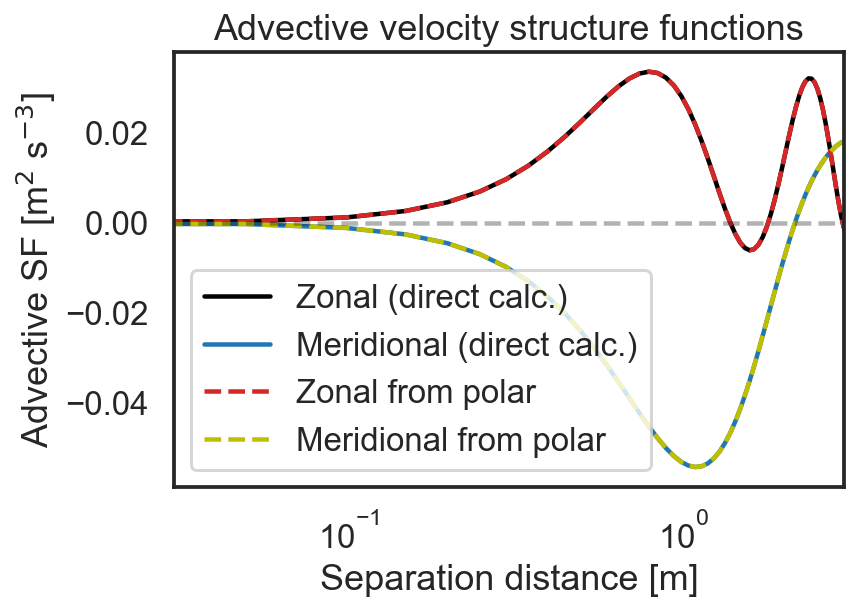

In [8]:
# First, let us check that the polar code calculates the same 
# zonal (purely x-separated) and meridional (purely y-separated)
# advective structure functions as the core 1D calculation modules

import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots()

ax1.semilogx(sfs_list['x-diffs'], sfs_list['SF_advection_velocity_x'],label=r'Zonal (direct calc.)',color='k')
ax1.semilogx(sfs_list['y-diffs'], sfs_list['SF_advection_velocity_y'], label=r'Meridional (direct calc.)',
             color='tab:blue')
ax1.semilogx(sfs_list['y-diffs'], sfs_2D_maps['SF_velocity_advection_xy'][:,64], label=r'Zonal from polar',
             color='tab:red', linestyle='dashed')
ax1.semilogx(sfs_list['y-diffs'], sfs_2D_maps['SF_velocity_advection_xy'][0,64:], label=r'Meridional from polar',
             color='y', linestyle='dashed')

ax1.set_ylabel(r"Advective SF [m$^2$ s$^{-3}$]")
ax1.set_xlabel(r"Separation distance [m]")
ax1.set_xlim(3e-2,3e0)
ax1.legend()
plt.hlines(0,3e-2,3e0,color='k',linestyle='dashed',alpha=0.3)
plt.title('Advective velocity structure functions');

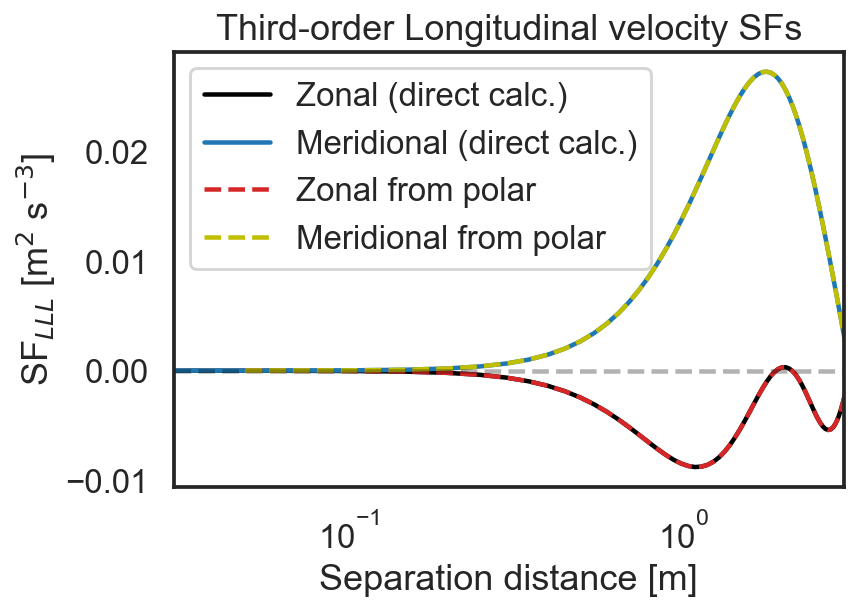

In [9]:
# Then repeat check for third-order longitudinal SF

import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots()

ax1.semilogx(sfs_list['x-diffs'], sfs_list['SF_LLL_x'],label=r'Zonal (direct calc.)',color='k')
ax1.semilogx(sfs_list['y-diffs'], sfs_list['SF_LLL_y'], label=r'Meridional (direct calc.)',
             color='tab:blue')
ax1.semilogx(sfs_list['y-diffs'], sfs_2D_maps['SF_LLL_xy'][:,64], label=r'Zonal from polar',
             color='tab:red', linestyle='dashed')
ax1.semilogx(sfs_list['y-diffs'], sfs_2D_maps['SF_LLL_xy'][0,64:], label=r'Meridional from polar',
             color='y', linestyle='dashed')

ax1.set_ylabel(r"SF$_{LLL}$ [m$^2$ s$^{-3}$]")
ax1.set_xlabel(r"Separation distance [m]")
ax1.set_xlim(3e-2,3e0)
ax1.legend()
plt.hlines(0,3e-2,3e0,color='k',linestyle='dashed',alpha=0.3)
plt.title('Third-order Longitudinal velocity SFs');

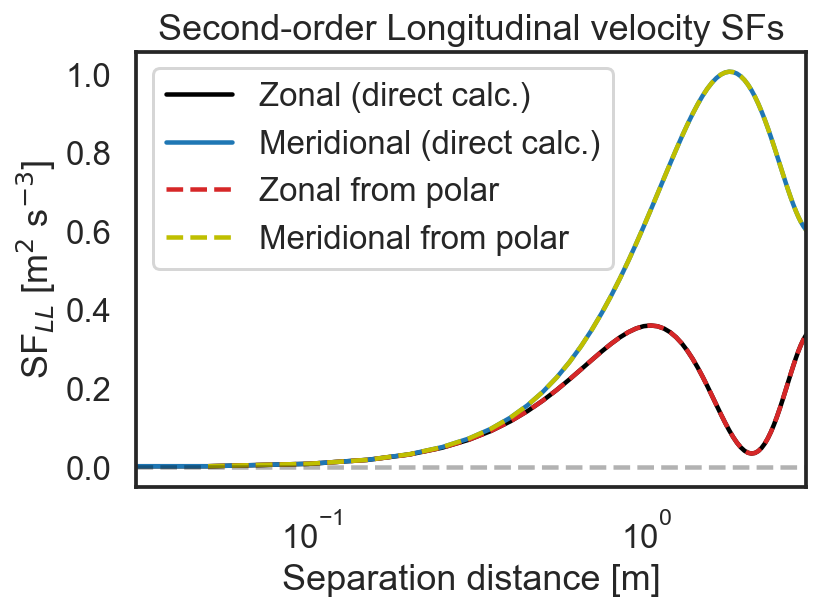

In [10]:
# Then repeat check for second-order longitudinal SF

import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots()

ax1.semilogx(sfs_list['x-diffs'], sfs_list['SF_LL_x'],label=r'Zonal (direct calc.)',color='k')
ax1.semilogx(sfs_list['y-diffs'], sfs_list['SF_LL_y'], label=r'Meridional (direct calc.)',
             color='tab:blue')
ax1.semilogx(sfs_list['y-diffs'], sfs_2D_maps['SF_LL_xy'][:,64], label=r'Zonal from polar',
             color='tab:red', linestyle='dashed')
ax1.semilogx(sfs_list['y-diffs'], sfs_2D_maps['SF_LL_xy'][0,64:], label=r'Meridional from polar',
             color='y', linestyle='dashed')

ax1.set_ylabel(r"SF$_{LL}$ [m$^2$ s$^{-3}$]")
ax1.set_xlabel(r"Separation distance [m]")
ax1.set_xlim(3e-2,3e0)
ax1.legend()
plt.hlines(0,3e-2,3e0,color='k',linestyle='dashed',alpha=0.3)
plt.title('Second-order Longitudinal velocity SFs');